In [77]:
import numpy as np
import matplotlib.pyplot as plt

import data.getSyntheticData as SyntheticData

from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.svm import OneClassSVM
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import precision_score, recall_score

from models.OCSMM import OCSMM
from utils.gridSearch import *


In [79]:
# Generate Synthetic Data
Strain = SyntheticData.genSyntheticTrainData(n_sample=100, n_sets=50)

Splot = SyntheticData.genSyntheticTrainData(n_sample=100, n_sets=9)
X_anomaly1 = np.random.multivariate_normal(mean = [0, 0], cov = np.identity(2), size=100)
X_anomaly2 = np.random.multivariate_normal(mean = [0, 0], cov = np.identity(2), size=100)
X_anomaly3 = np.random.multivariate_normal(mean = [0, 0], cov = np.identity(2), size=100)
Splot.extend([X_anomaly1, X_anomaly2, X_anomaly3])
Yplot = [1] * 9 + [-1] * 3

def compute_kernel(X, Y, sigma):
    K = np.zeros((len(X), len(Y)))
    rbf = RBF(length_scale=sigma)
    for i in range(len(X)):
        for j in range(len(Y)):
            kernel = rbf(X[i], Y[j])
            n_i = X[i].shape[0]
            n_j = Y[j].shape[0]
            K[i, j] = np.sum(np.sum(kernel, axis=0), axis=0) / (n_i * n_j)
    return K


/Users/kartikg1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kartikg1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kartikg1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kartikg1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


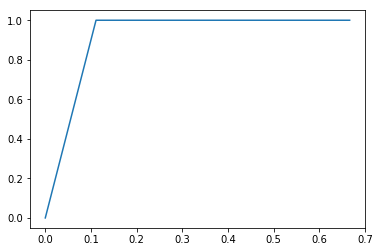

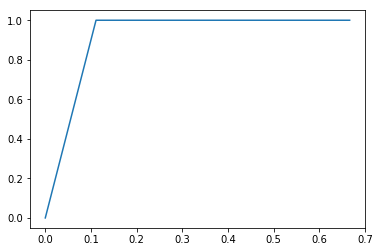

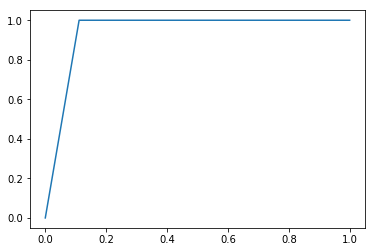

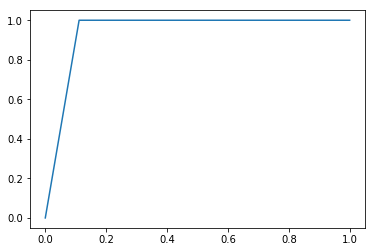

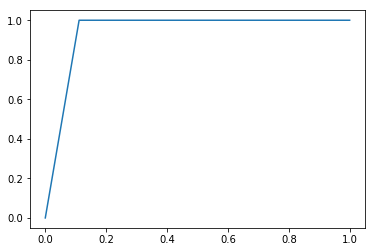

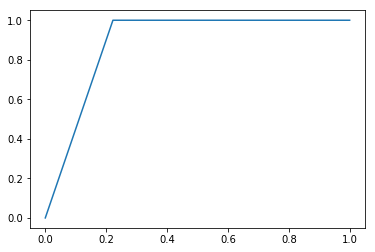

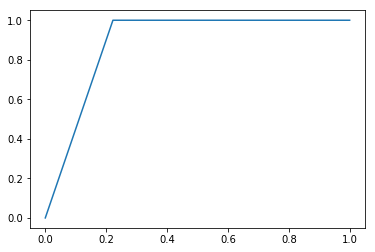

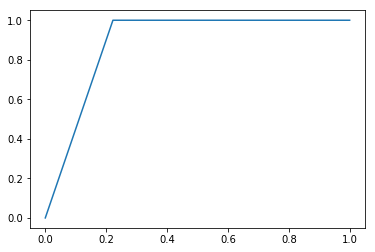

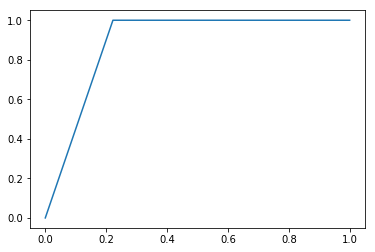

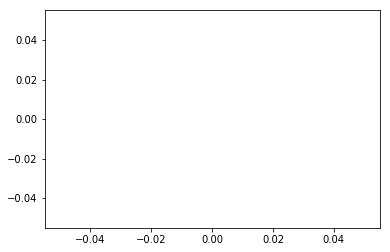

In [84]:
precision = np.zeros((10, 10))
recall = np.zeros((10, 10))
for i, sigma in enumerate([0.1 * i for i in range(1, 10)]):
    K = compute_kernel(Strain, Strain, sigma)
    Ktest = compute_kernel(Splot, Strain, sigma)
    for j, nu in enumerate([0.1 * i for i in range(1, 10)]):
        ocsmm = OneClassSVM(kernel='precomputed', nu=nu)
        ocsmm.fit(K)
        Ypred = ocsmm.predict(Ktest)
        precision[i, j] = precision_score(Yplot, Ypred)
        recall[i, j] = recall_score(Yplot, Ypred)

for i in range(10):
    plt.figure()
    plt.plot(recall[i, :], precision[i, :])